In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16

In [14]:
dataset_dir = './LP-IV-datasets/Object Detection/caltech-101'
dataset_datagen = ImageDataGenerator(
    rescale = 1.0/255
)

batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size = (64, 64),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 9144 images belonging to 102 classes.


In [15]:
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [20]:
weight_path = "./LP-IV-datasets/Object Detection/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights = weight_path, input_shape=(64,64,3), include_top = False)

for layer in base_model.layers:
    layer.trainable = False

In [25]:
x = Flatten()(base_model.output)
x = Dense(64, activation = 'relu')(x)
prediction = Dense(102, activation = 'softmax')(x)

model = Model(base_model.input, prediction)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [30]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 2)

Epoch 1/2
63/63 [==============================] - 28s 441ms/step - loss: 3.0117 - accuracy: 0.3600 - val_loss: 2.8278 - val_accuracy: 0.4045
Epoch 2/2
63/63 [==============================] - 29s 461ms/step - loss: 2.3434 - accuracy: 0.4900 - val_loss: 2.4385 - val_accuracy: 0.4755


In [31]:
loss, accuracy = model.evaluate(x_test, y_test)

63/63 [==============================] - 14s 230ms/step - loss: 2.4385 - accuracy: 0.4755


In [36]:
predicted = model.predict(x_test)
labels = list(dataset_generator.class_indices.keys())

63/63 [==============================] - 14s 219ms/step


In [37]:
import numpy as np

Predicted Value : airplanes
Actual Value : helicopter


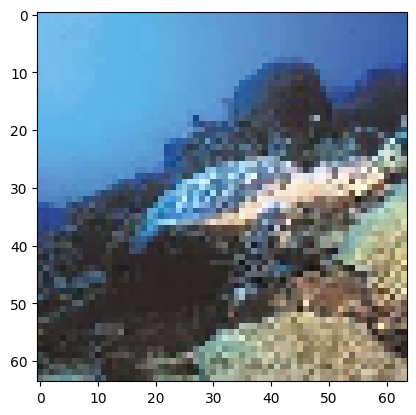

In [40]:
n = 122
plt.imshow(x_test[0])

print('Predicted Value : ' + labels[np.argmax(predicted[n])])
print('Actual Value : ' + labels[np.argmax(y_test[n])])